# ABS Annual National Accounts

## Python setup

In [1]:
# system imports
import textwrap

# analytic imports
import pandas as pd
import readabs as ra
import mgplot as mg
from readabs import metacol as mc

# local imports
from abs_helper import get_abs_data

# pandas display settings
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 999

# display charts within this notebook
SHOW = True

## Get Primary Data

In [2]:
abs_dict, meta, source, _ = get_abs_data("5204.0")
tw = textwrap.TextWrapper(width=80)
tw.wrap(", ".join(abs_dict.keys()))

Table 5204014_Market_Sector_Productivity has no 'Index' sheet.


['5204001_Key_National_Aggregates, 5204002_Expenditure_on_GDP,',
 '5204003_Expenditure_on_GDP_CPI, 5204004_Expenditure_on_GDP_IPD,',
 '5204005_GVA_by_Industry, 5204006_Income_from_GDP,',
 '5204007_National_Income_Account, 5204008_National_Capital_Account,',
 '5204009_National_Financial_Account, 5204010_National_Balance_Sheet,',
 '5204011_Balance_Sheet_Accumulation, 5204012_National_Analytical_Income,',
 '5204013_Productivity, 5204015_Labour_Productivity_Input,',
 '5204016_Selected_Analytical_Series, 5204017_NonFin_Corp_Income_Account,',
 '5204018_NonFin_Corp_Capital_Account, 5204019_NonFin_Corp_Financial_Account,',
 '5204020_NonFin_Corp_Balance_Sheet, 5204021_Priv_NonFin_Corp_Income_Account,',
 '5204022_Public_NonFin_Corp_Income_Account,',
 '5204023_Priv_NonFin_Corp_Capital_Account,',
 '5204024_Public_NonFin_Corp_Capital_Account, 5204025_Fin_Corp_Income_Account,',
 '5204026_Fin_Corp_Capital_Account, 5204027_Fin_Corp_Financial_Account,',
 '5204028_Fin_Corp_Balance_Sheet, 5204029_Life_In

## Plot

### Headline growth rates

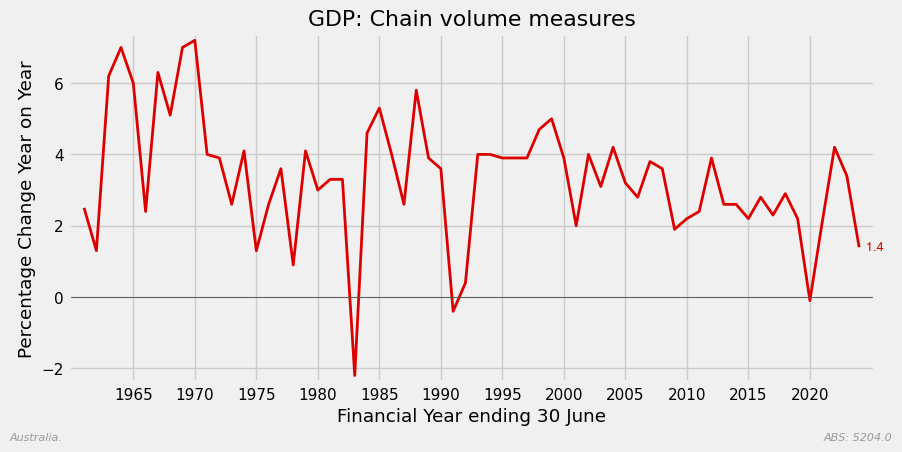

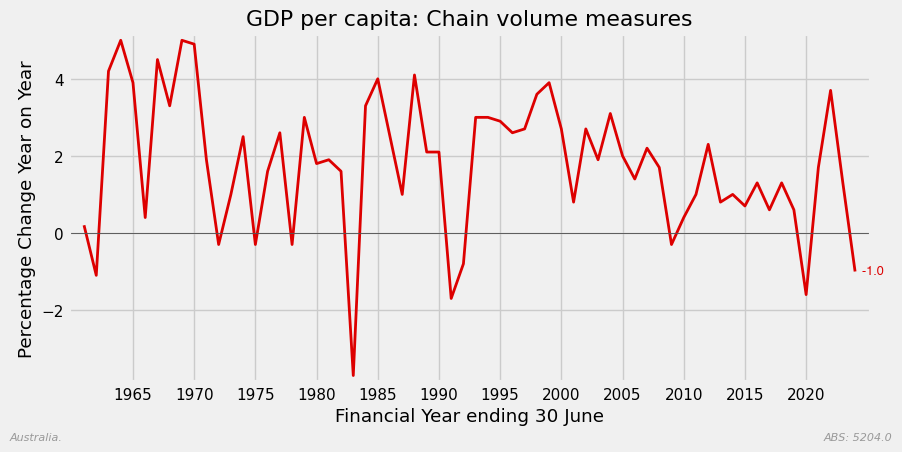

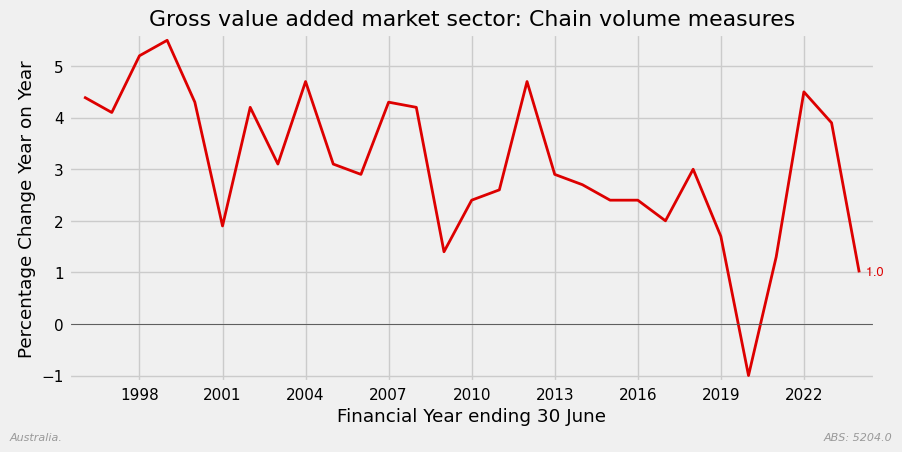

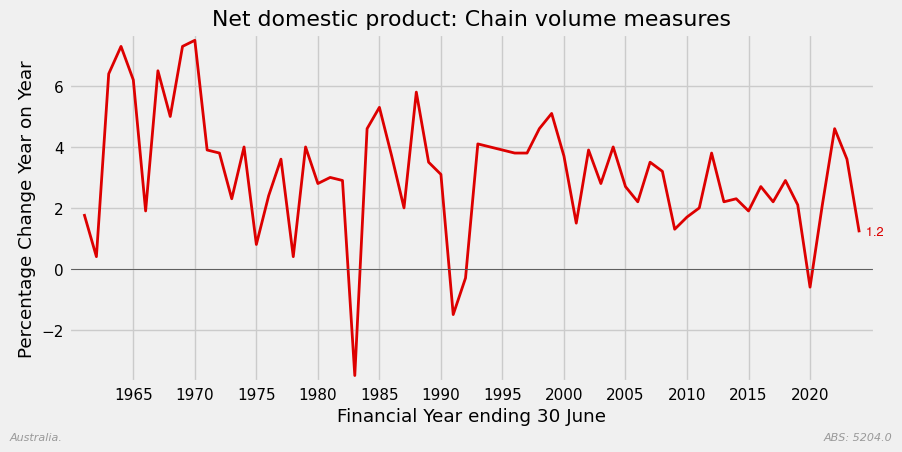

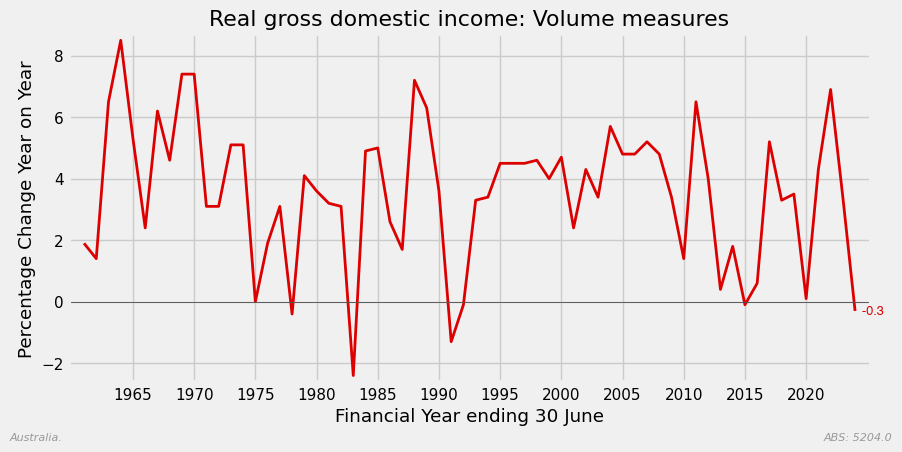

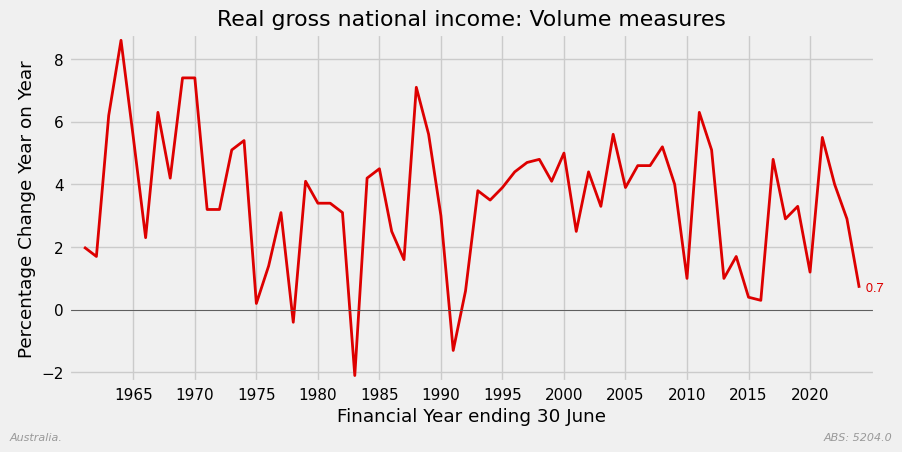

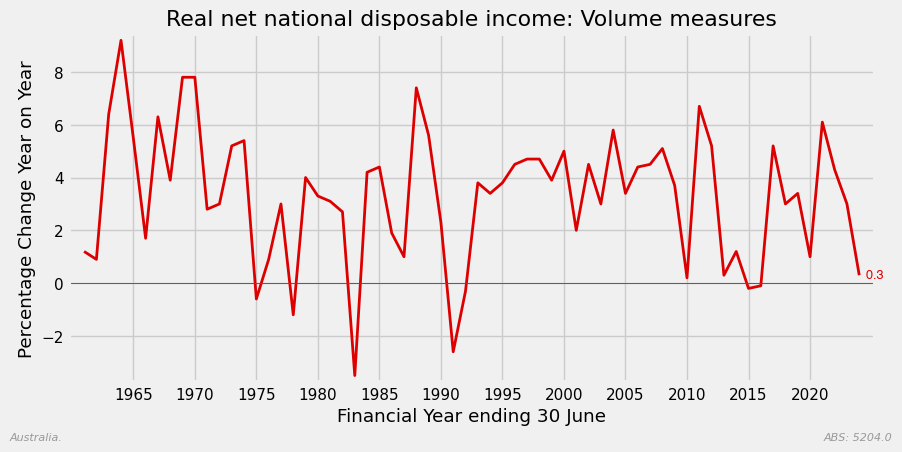

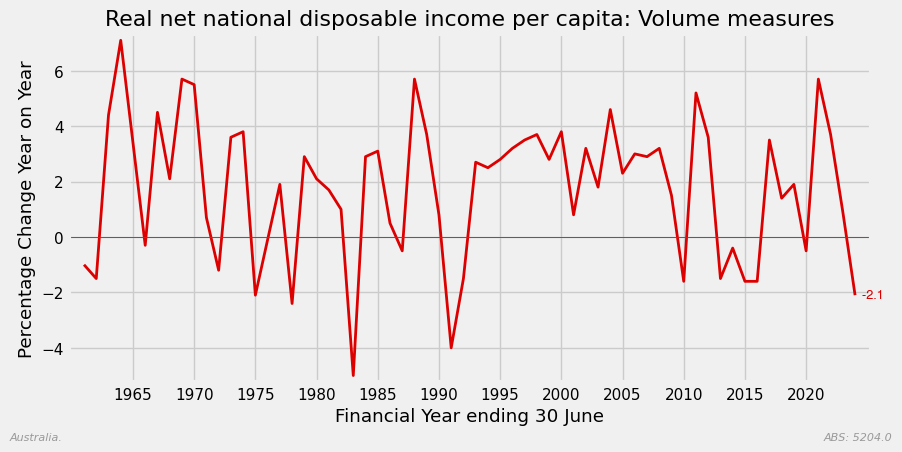

In [7]:
def headline_growth() -> None:
    """Headline Growth Rates."""

    table = "5204001_Key_National_Aggregates"
    did_list = [
        "GROSS DOMESTIC PRODUCT: Chain volume measures - Percentage changes ;",
        "GDP per capita: Chain volume measures - Percentage changes ;",
        "Gross value added market sector: Chain volume measures - Percentage changes ;",
        "Net domestic product: Chain volume measures - Percentage changes ;",
        "Real gross domestic income: Volume measures - Percentage changes ;",
        "Real gross national income: Volume measures - Percentage changes ;",
        "Real net national disposable income: Volume measures - Percentage changes ;",
        "Real net national disposable income per capita: Volume measures - Percentage changes ;",
    ]
    for did in did_list:
        selector = {
            table: mc.table,
            did: mc.did,
        }
        _table, series_id, _units = ra.find_abs_id(meta, selector, verbose=False)
        series = abs_dict[table][series_id]
        mg.line_plot_finalise(
            series,
            title=did
                .replace(" - Percentage changes ;", "")
                .replace("GROSS DOMESTIC PRODUCT", "GDP"),
            ylabel="Percentage Change Year on Year",
            xlabel="Financial Year ending 30 June",
            y0=True,
            annotate=True,
            rounding=1,
            rfooter=source,
            lfooter="Australia. ",
            show=SHOW,
        )


headline_growth()

### Productivity in the Market Sector

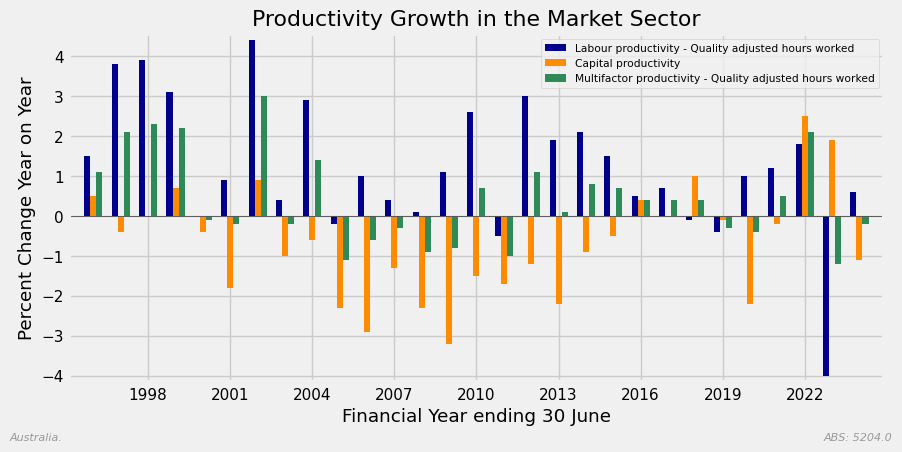

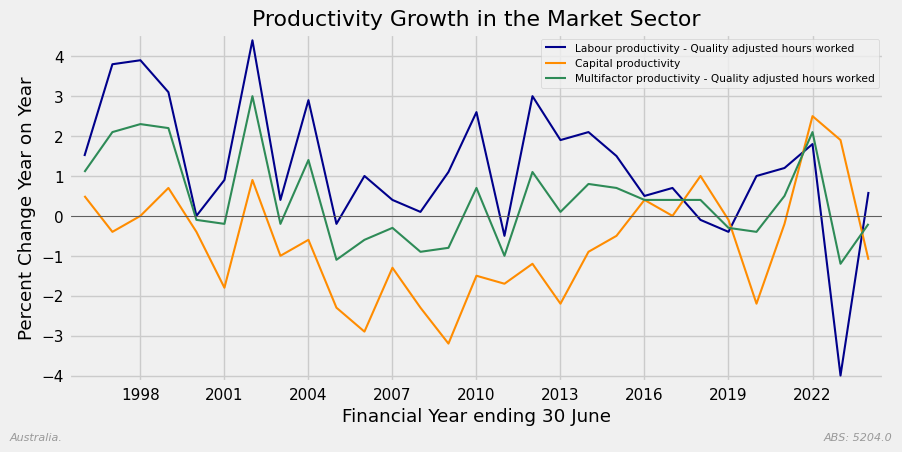

In [4]:
def ms_productivity() -> None:
    """Plot Productivity Growth in the Market Sector."""

    table = "5204013_Productivity"
    selector = {
        table: mc.table,
        "Percent": mc.unit,
        "Quality|Capital": mc.did,  # 3 rather than 5 series
    }
    rows = ra.search_abs_meta(
        meta,
        selector,
        regex=True,
    )
    data = abs_dict[table][rows[mc.id]]
    names = rows[mc.did].str.replace(": Percentage changes ;", "")
    data.index.name = "Year"
    data.columns = names
    for f in (mg.bar_plot_finalise, mg.line_plot_finalise):
        f(
            data,
            title="Productivity Growth in the Market Sector",
            ylabel="Percent Change Year on Year",
            xlabel="Financial Year ending 30 June",
            y0=True,
            tag=str(f),
            width=0.66 if f is mg.bar_plot_finalise else 1.5,
            rfooter=source,
            lfooter="Australia. ",
            show=SHOW,
        )


ms_productivity()

## Finished

In [5]:
# watermark
%load_ext watermark
%watermark -u -t -d --iversions --watermark --machine --python --conda
print("Done")

Last updated: 2025-10-19 07:30:41

Python implementation: CPython
Python version       : 3.13.8
IPython version      : 9.4.0

conda environment: n/a

Compiler    : Clang 20.1.4 
OS          : Darwin
Release     : 25.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

pandas : 2.3.1
mgplot : 0.2.12
readabs: 0.1.4

Watermark: 2.5.0

Done
